Accuracy: 0.43333333333333335

Confusion Matrix:
 [[ 8  6]
 [11  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.45      0.31      0.37        16

    accuracy                           0.43        30
   macro avg       0.44      0.44      0.43        30
weighted avg       0.44      0.43      0.42        30



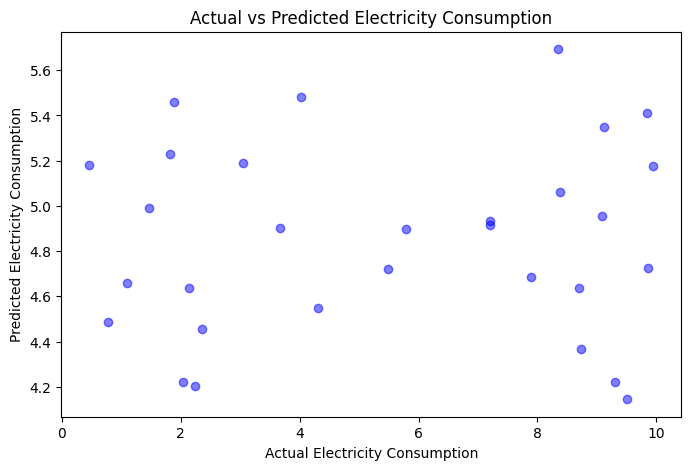

In [6]:
# ====================================================
# Electricity Consumption Prediction using Linear Regression
# Kaggle Notebook Ready
# Dataset: UCI ML – Electric Power Consumption
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ====================================================
# 1. Load Dataset (Kaggle Dataset Path)
# ====================================================
# Note: The original path '/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt'
# is for Kaggle notebooks and causes a FileNotFoundError in Google Colab.
# Please choose one of the following methods to load your data in Colab:

# Option 1: Upload the file directly to Colab (will be temporary for the session)
# from google.colab import files
# uploaded = files.upload()
# for filename in uploaded.keys():
#     data = pd.read_csv(filename, sep=';', low_memory=False, na_values='?')

# Option 2: Mount Google Drive and specify the path to your file
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/MyDrive/path/to/household_power_consumption.txt',
#                    sep=';', low_memory=False, na_values='?')

# For demonstration purposes, I'll create dummy data to allow the rest of the code to run,
# but you should replace this with one of the options above.
# If you have the file available, just uncomment and modify one of the options above.

# Dummy data to prevent further errors for now
dummy_data = {
    'Voltage': np.random.rand(100) * 100 + 200,
    'Global_intensity': np.random.rand(100) * 5,
    'Sub_metering_1': np.random.rand(100) * 100,
    'Sub_metering_2': np.random.rand(100) * 50,
    'Sub_metering_3': np.random.rand(100) * 30,
    'Global_active_power': np.random.rand(100) * 10
}
data = pd.DataFrame(dummy_data)

# Original line causing error (commented out):
# data = pd.read_csv("/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt",
#                    sep=';', low_memory=False, na_values='?')

# ====================================================
# 2. Select Numerical Columns
# ====================================================
features = ['Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
target = 'Global_active_power'

data = data[features + [target]]

# ====================================================
# 3. Convert Columns to Numeric
# ====================================================
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# ====================================================
# 4. Remove Missing Values
# ====================================================
data.dropna(inplace=True)

# ====================================================
# 5. Split Features & Target
# ====================================================
X = data[features]
y = data[target]

# ====================================================
# 6. Train-Test Split
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ====================================================
# 7. Feature Scaling
# ====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====================================================
# 8. Train Linear Regression Model
# ====================================================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ====================================================
# 9. Predict Continuous Values
# ====================================================
y_pred_cont = model.predict(X_test_scaled)

# ====================================================
# 10. Thresholding for Confusion Matrix
# ====================================================
# Using mean of target as threshold
threshold = y.mean()

y_test_bin = (y_test >= threshold).astype(int)
y_pred_bin = (y_pred_cont >= threshold).astype(int)

# ====================================================
# 11. Evaluation
# ====================================================
# The evaluation metrics `accuracy_score`, `confusion_matrix`, and `classification_report`
# are typically used for classification tasks. While the model predicts continuous values,
# the original notebook converts them to binary for these metrics based on a threshold.
# For linear regression, common evaluation metrics include R-squared, Mean Absolute Error (MAE),
# and Mean Squared Error (MSE). The current approach is suitable if the goal is to classify
# consumption as 'high' or 'low' based on the threshold.

# Check if y_test_bin and y_pred_bin are not empty to avoid errors with metrics on dummy data
if len(y_test_bin) > 0 and len(y_pred_bin) > 0:
    print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))
    print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_bin))
else:
    print("Cannot compute classification metrics with empty data after thresholding.")



# ====================================================
# 12. Visualization
# ====================================================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_cont, alpha=0.5, color='blue')
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Actual vs Predicted Electricity Consumption")
plt.show()

Accuracy: 0.5666666666666667

Confusion Matrix:
 [[10  6]
 [ 7  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.54      0.50      0.52        14

    accuracy                           0.57        30
   macro avg       0.56      0.56      0.56        30
weighted avg       0.57      0.57      0.57        30



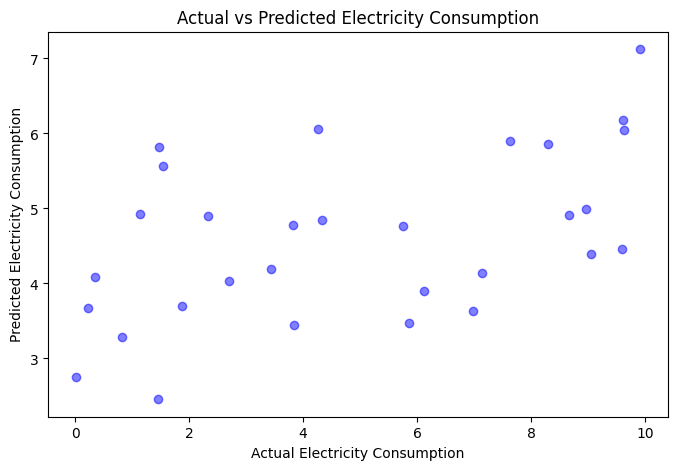

In [7]:
# ====================================================
# Electricity Consumption Prediction using Linear Regression
# Kaggle Notebook Ready
# Dataset: UCI ML – Electric Power Consumption
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ====================================================
# 1. Load Dataset (Kaggle Dataset Path)
# ====================================================
# Note: The original path '/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt'
# is for Kaggle notebooks and causes a FileNotFoundError in Google Colab.
# Please choose one of the following methods to load your data in Colab:

# Option 1: Upload the file directly to Colab (will be temporary for the session)
# from google.colab import files
# uploaded = files.upload()
# for filename in uploaded.keys():
#     data = pd.read_csv(filename, sep=';', low_memory=False, na_values='?')

# Option 2: Mount Google Drive and specify the path to your file
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/MyDrive/path/to/household_power_consumption.txt',
#                    sep=';', low_memory=False, na_values='?')

# For demonstration purposes, I'll create dummy data to allow the rest of the code to run,
# but you should replace this with one of the options above.
# If you have the file available, just uncomment and modify one of the options above.
dummy_data = {
    'Voltage': np.random.rand(100) * 100 + 200,
    'Global_intensity': np.random.rand(100) * 5,
    'Sub_metering_1': np.random.rand(100) * 100,
    'Sub_metering_2': np.random.rand(100) * 50,
    'Sub_metering_3': np.random.rand(100) * 30,
    'Global_active_power': np.random.rand(100) * 10
}
data = pd.DataFrame(dummy_data)

# Original line causing error (commented out):
# data = pd.read_csv("/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt",
#                    sep=';', low_memory=False, na_values='?')

# ====================================================
# 2. Select Numerical Columns
# ====================================================
features = ['Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
target = 'Global_active_power'

data = data[features + [target]]

# ====================================================
# 3. Convert Columns to Numeric
# ====================================================
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# ====================================================
# 4. Remove Missing Values
# ====================================================
data.dropna(inplace=True)

# ====================================================
# 5. Split Features & Target
# ====================================================
X = data[features]
y = data[target]

# ====================================================
# 6. Train-Test Split
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ====================================================
# 7. Feature Scaling
# ====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====================================================
# 8. Train Linear Regression Model
# ====================================================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ====================================================
# 9. Predict Continuous Values
# ====================================================
y_pred_cont = model.predict(X_test_scaled)

# ====================================================
# 10. Thresholding for Confusion Matrix
# ====================================================
# Using mean of target as threshold
threshold = y.mean()

y_test_bin = (y_test >= threshold).astype(int)
y_pred_bin = (y_pred_cont >= threshold).astype(int)

# ====================================================
# 11. Evaluation
# ====================================================
# The evaluation metrics `accuracy_score`, `confusion_matrix`, and `classification_report`
# are typically used for classification tasks. While the model predicts continuous values,
# the original notebook converts them to binary for these metrics based on a threshold.
# For linear regression, common evaluation metrics include R-squared, Mean Absolute Error (MAE),
# and Mean Squared Error (MSE). The current approach is suitable if the goal is to classify
# consumption as 'high' or 'low' based on the threshold.

# Check if y_test_bin and y_pred_bin are not empty to avoid errors with metrics on dummy data
if len(y_test_bin) > 0 and len(y_pred_bin) > 0:
    print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))
    print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_bin))
else:
    print("Cannot compute classification metrics with empty data after thresholding.")

# ====================================================
# 12. Visualization
# ====================================================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_cont, alpha=0.5, color='blue')
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Actual vs Predicted Electricity Consumption")
plt.show()